# Bike Demand Visualization Project

## Table of Contents:
* [Goal](#goal)
* [Dataset](#dataset)
    * [Importing the Libraries](#import)
    * [Reading and Viewing the Dataset](#reading)
    * [Detecting Missing Values](#missing)
    * [Preprocessing](#preprocessing)
* [Exploratory Data Analysis](#EDA)
    * [Distribution of Various Discrete Features on Season, Holiday, Weeekend and Weathercode](#dist)
    * [Correlation with Heatmap](#heat)
    * [Correlation of the Target Variable](#targetcorr)
    * [Bike Shares over the Years](#sharesovertheyears)
    * [Bike Shares by Month](#sharesbymonths)
    * [Bike Shares by Month over the Years](#sharesbymonthsovertheyears)
    * [Bike Shares at an Hourly Rate on Holidays](#houronholiday)
    * [Bike Shares at an Hourly Rate on Weekends](#houronweekend)
    * [Bike Shares at an Hourly Rate on different Seaons](#houronseason)
    * [Bike Shares by the Day of the Week](#dayoftheweek)
    * [Bike Shares by the Day of the Month](#dayofthemonth)
    * [Bike Shares by Year](#byyear)
    * [Bike Shares on Holidays by Seasons](#onholidaysbyseasons)
    * [Distribution of Bike Shares by Weekdays/Weekend](#bikesharesbyweekdays)
    * [Distribution of Weather Condition by Seasons](#wconditions)
* [Conclusion](#conc)

## Goal <a class="anchor" id="goal"></a>

Free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution. The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

## Dataset<a class="anchor" id="dataset"></a>

### Importing the Libraries <a class="anchor" id="import"></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Viewing the Dataset <a class="anchor" id="reading"></a>

In [2]:
df = pd.read_csv('store_sharing.csv')

In [3]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


### Detecting Missing Values and Duplicates  <a class="anchor" id="missing"></a>

In [5]:
df.isnull().any()

timestamp       False
cnt             False
t1              False
t2              False
hum             False
wind_speed      False
weather_code    False
is_holiday      False
is_weekend      False
season          False
dtype: bool

In [6]:
df.duplicated().value_counts()

False    17414
dtype: int64

### Preprocessing <a class="anchor" id="preprocessing"></a>

In [7]:
df.timestamp = df.timestamp.astype(dtype='datetime64')

df.set_index(df.timestamp,
             drop=True,
             inplace=True)                               # transforming timestamp in type and setting as index

In [8]:
df['day_of_the_week'] = df.index.day_of_week

df['day_of_the_month'] = df.index.strftime('%d')

df['hour'] = df.index.hour

df['month'] = df.index.month

season_mapping = {0 : 'Spring',
                  1 : "Summer",
                  2 : "Fall",
                  3 : "Winter"}

df['season'] = df.season.map(season_mapping)

df['year'] = df.index.year

df['year_and_month'] = df.index.strftime('%Y-%m')        # extracting new columns to access a certain period of time

## Exploratory Data Analysis <a class="anchor" id="EDA"></a>

To obtain insight from the data, we are going to be diving deeper into it by utilizing visualization tools and analyzing said visualization.

### Distribution of Various Discrete Features on Season, Holiday, Weeekend and Weathercode<a class="anchor" id="dist"></a>

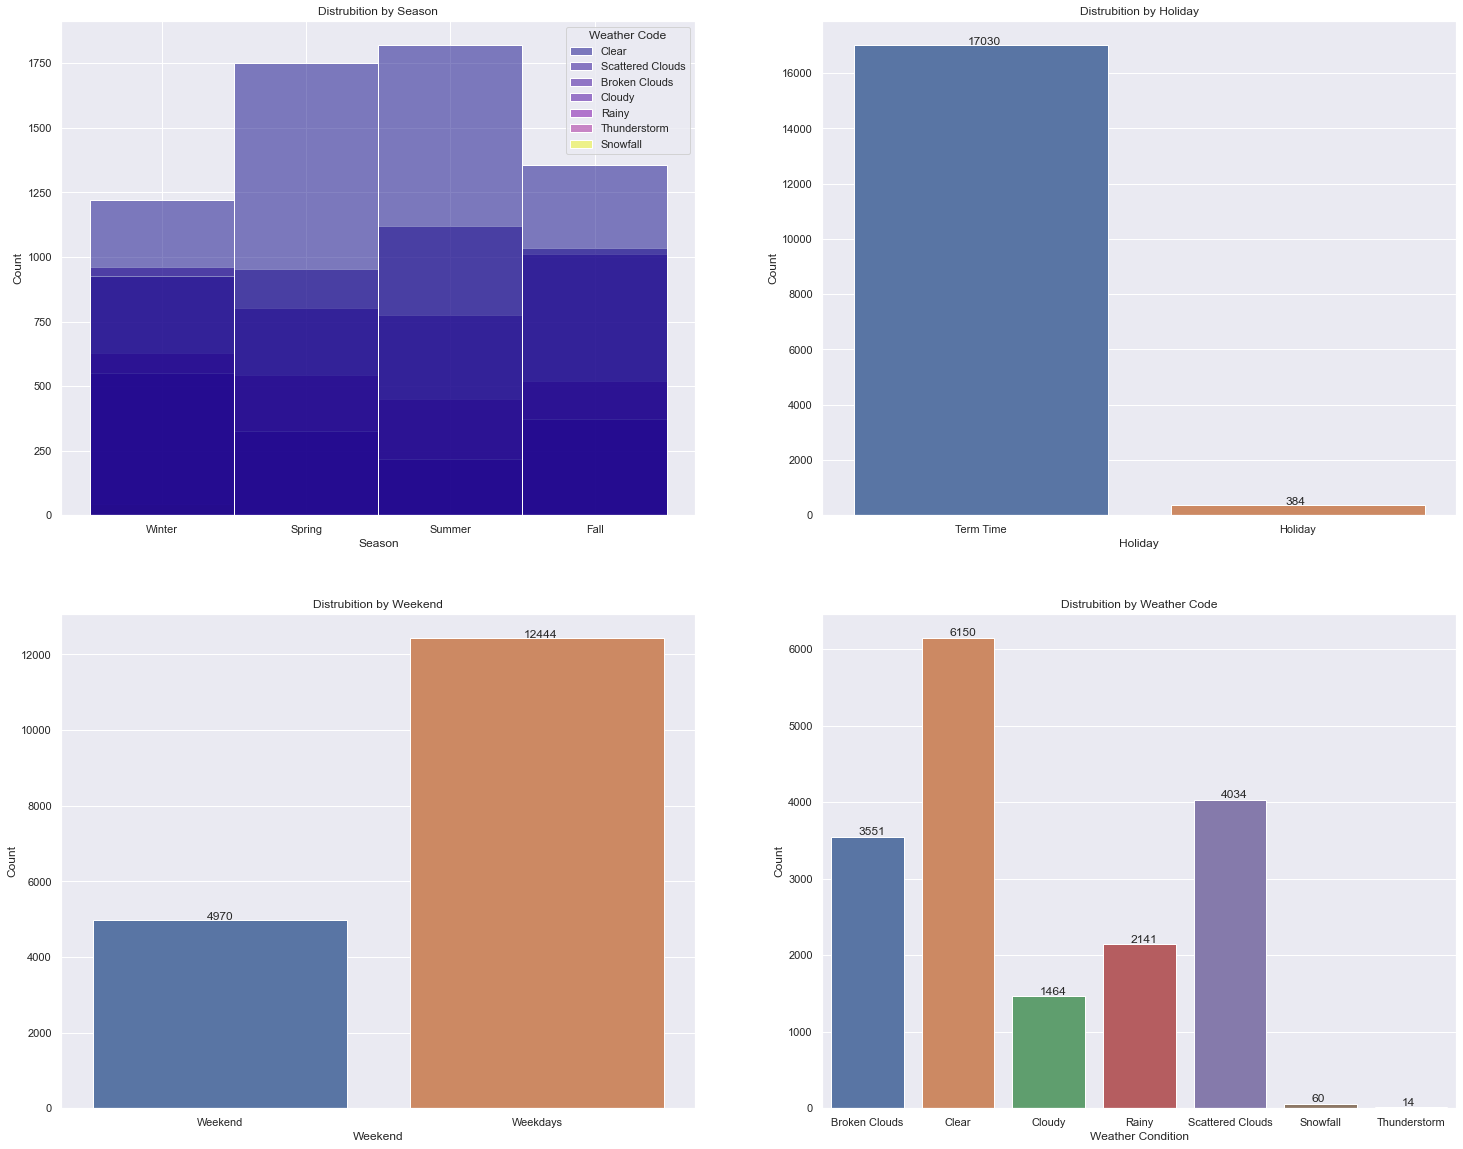

In [42]:
fig, ax = plt.subplots(2, 2, figsize=(25, 20))

sns.set_theme(style="darkgrid")

ax1 = sns.histplot(data=df,
                   x=df.season,
                   hue=df.weather_code,
                   palette='plasma',
                   ax=ax[0, 0])

ax1.set(xlabel='Season', ylabel='Count', title="Distrubition by Season")

legend = ax[0, 0].get_legend()
handles = legend.legendHandles
ax[0, 0].legend(handles, ['Clear',
                     'Scattered Clouds',
                     'Broken Clouds',
                     'Cloudy',
                     'Rainy',
                     'Thunderstorm',
                     "Snowfall",
                     "Freezing Fog"], title='Weather Code')

ax2 = sns.countplot(data=df,
                    x=df.is_holiday.apply(lambda x: "Holiday" if x == 1 else 'Term Time'),
                    ax=ax[0, 1])

for p in ax2.patches:
    ax2.annotate(p.get_height(), (p.get_x() + 0.36, p.get_height()));


ax2.set(xlabel='Holiday', ylabel='Count', title="Distrubition by Holiday")

ax3 = sns.countplot(data=df,
                    x=df.is_weekend.apply(lambda x: 'Weekend' if x == 1 else 'Weekdays'),
                    ax=ax[1, 0])

ax3.set(xlabel='Weekend', ylabel='Count', title="Distrubition by Weekend")

for p in ax3.patches:
    ax3.annotate(p.get_height(), (p.get_x() + 0.36, p.get_height()));

ax4 = sns.countplot(data=df,
                    x=df.weather_code.apply(lambda x: 'Clear' if x == 1 else
                                       ('Scattered Clouds' if x == 2 else
                                        ("Broken Clouds" if x == 3 else
                                         ('Cloudy' if x == 4 else
                                          ('Rainy' if x == 7 else
                                           ('Thunderstorm' if x == 10 else
                                            ('Snowfall' if x == 26 else
                                             ("Freezing Fog" if x == 94 else
                                              None)))))))),
                    ax=ax[1, 1])


ax4.set(xlabel='Weather Condition', ylabel='Count', title="Distrubition by Weather Code")



for p in ax4.patches:
    ax4.annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+20))
    



plt.show()

 ### Correlation with Heatmap <a class="anchor" id="heat"></a>

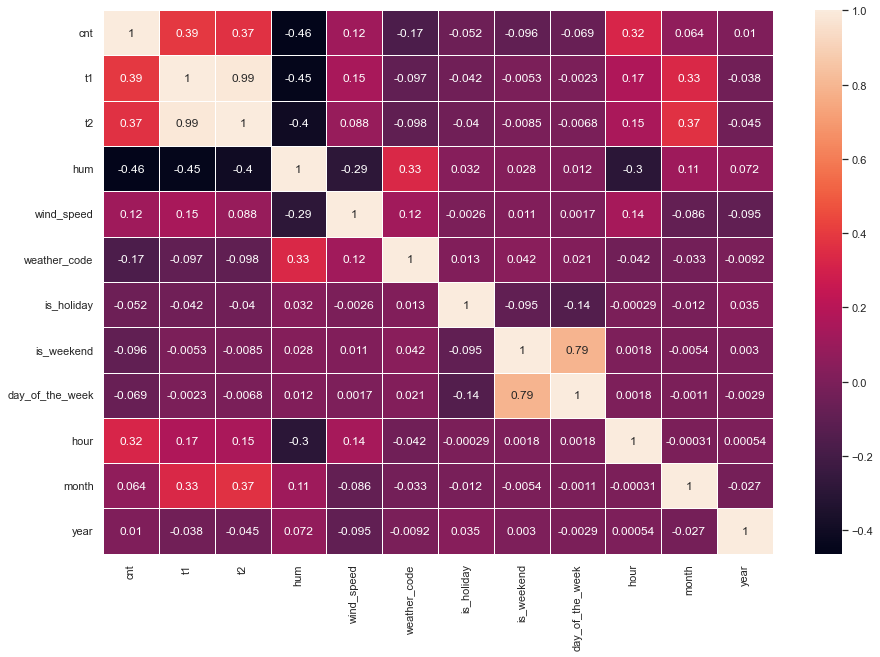

In [10]:
plt.figure(figsize=(15, 10))

sns_heatmap = sns.heatmap(df.corr(),
                          #cmap="YlGnBu",
                          linewidths=0.75,
                          annot=True)

### Correlation of the Target Variable <a class="anchor" id="targetcorr"></a>

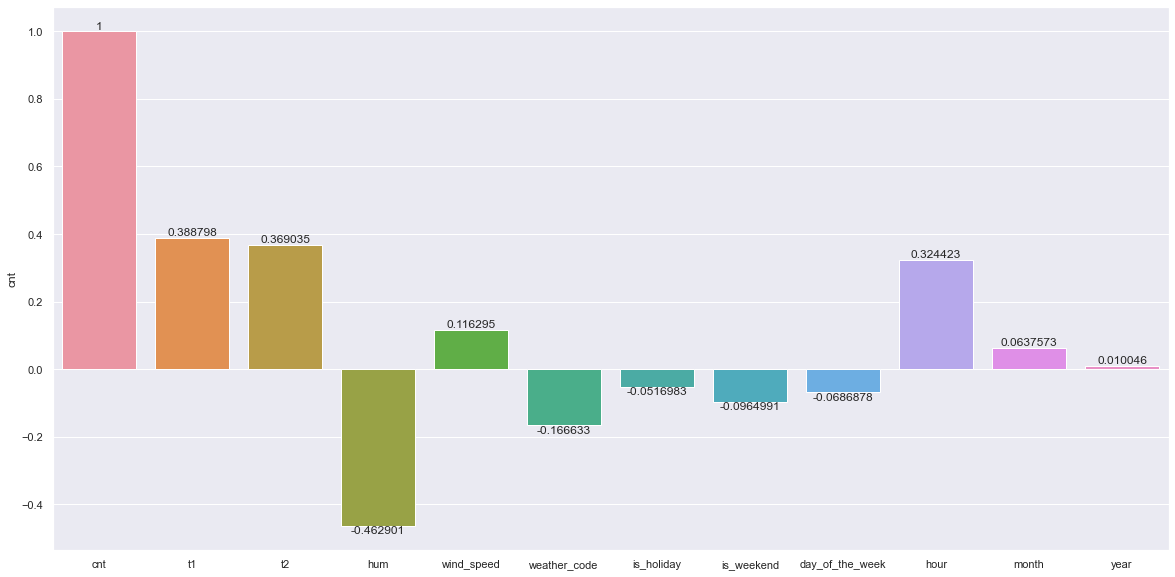

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))

sns.barplot(x=df.corr().cnt.index,
            y=df.corr().cnt,
            ax=ax)

ax.bar_label(ax.containers[-1], label_type='edge');

### Bike Shares over the Years <a class="anchor" id="sharesovertheyears"></a>

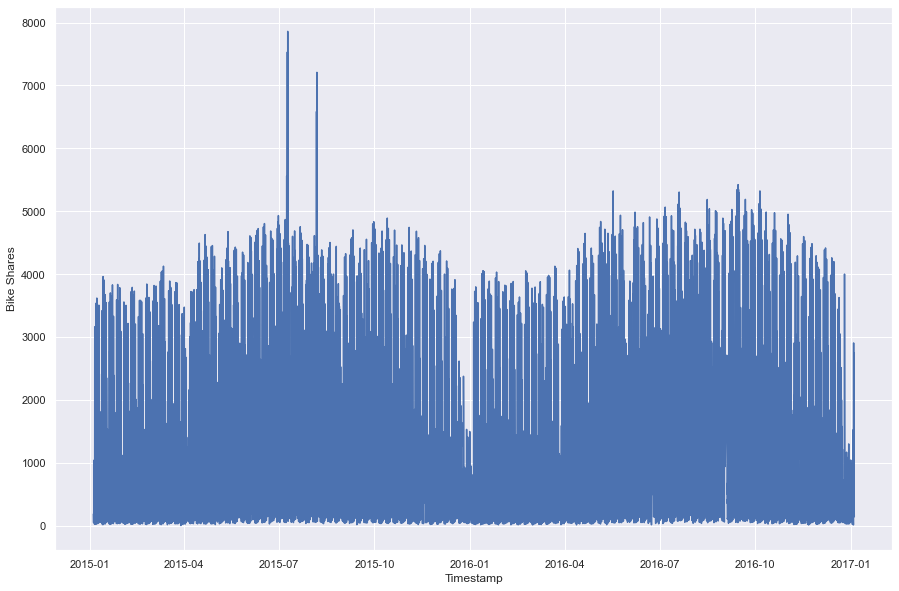

In [12]:
plt.figure(figsize=(15, 10))

plt.ylabel("Bike Shares")
plt.xlabel('Timestamp')


sns.lineplot(x=df.index,
             y=df.cnt);

### Bike Shares by Months<a class="anchor" id="sharesbymonths"></a>

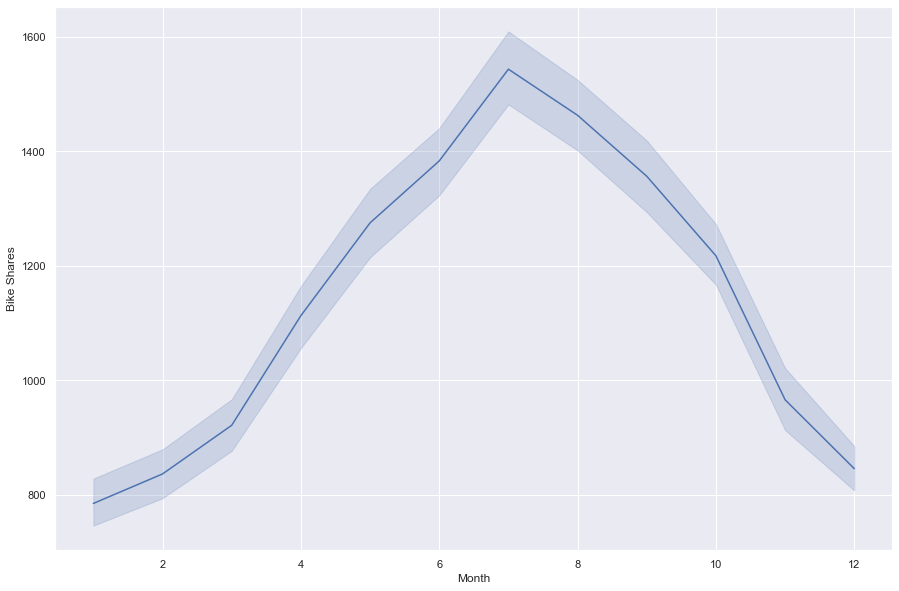

In [13]:
plt.figure(figsize=(15, 10))

plt.ylabel("Bike Shares")
plt.xlabel('Month')

sns.lineplot(x=df.month,
             y=df.cnt);

### Bike Shares by Month over the Years <a class="anchor" id="sharesbymonthsovertheyears"></a>

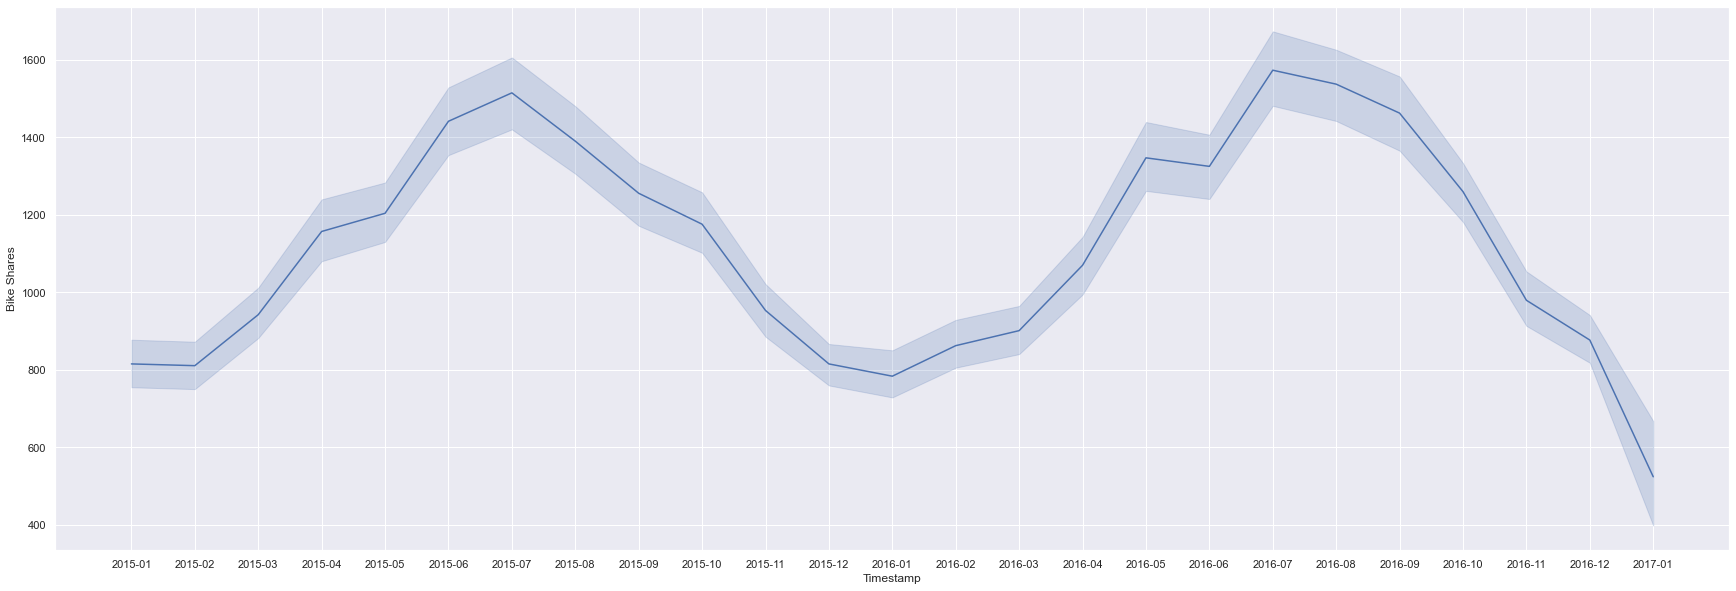

In [14]:
plt.figure(figsize=(30, 10))

plt.ylabel("Bike Shares")
plt.xlabel('Timestamp')

sns.lineplot(x=df.year_and_month,
             y=df.cnt);

### Bike Shares at an Hourly Rate on Holidays <a class="anchor" id="houronholiday"></a>

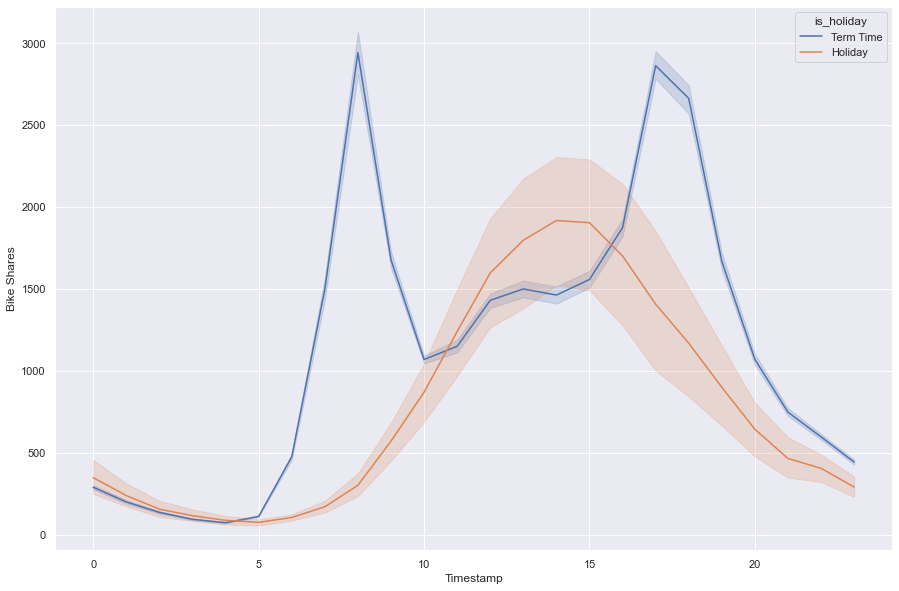

In [32]:
plt.figure(figsize=(15, 10))

plt.ylabel("Bike Shares")
plt.xlabel('Timestamp')

sns.lineplot(x=df.index.hour,
            y=df.cnt,
            hue=df.is_holiday.apply(lambda x: 'Holiday' if x == 1 else 'Term Time'));

### Bike Shares at an Hourly Rate on Weekends <a class="anchor" id="houronweekend"></a>

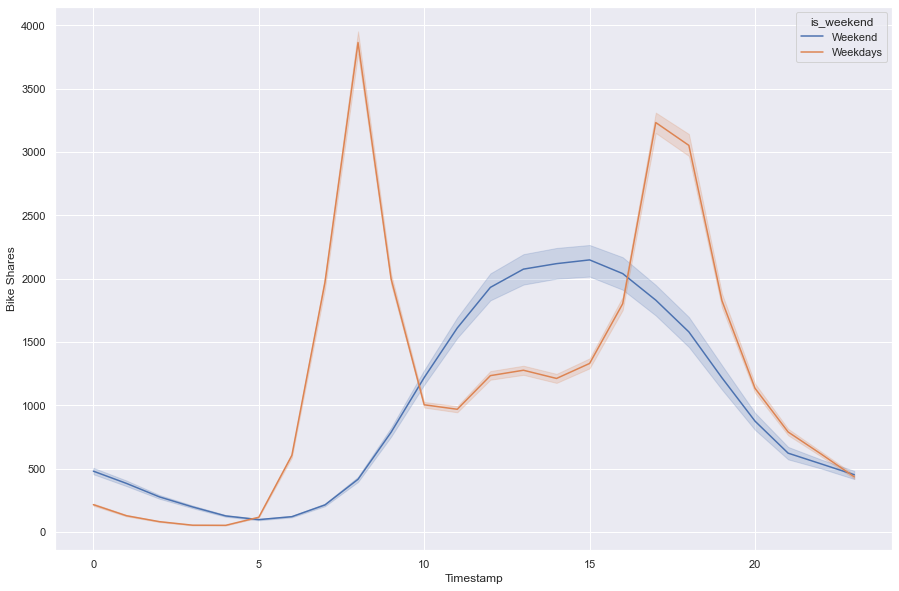

In [28]:
plt.figure(figsize=(15, 10))

plt.ylabel("Bike Shares")
plt.xlabel('Timestamp')

sns.lineplot(x=df.is_holiday.index.hour,
            y=df.cnt,
            hue=df.is_weekend.apply(lambda x: 'Weekend' if x == 1 else 'Weekdays'));

### Bike Shares at an Hourly Rate on different Seaons <a class="anchor" id="houronseason"></a>

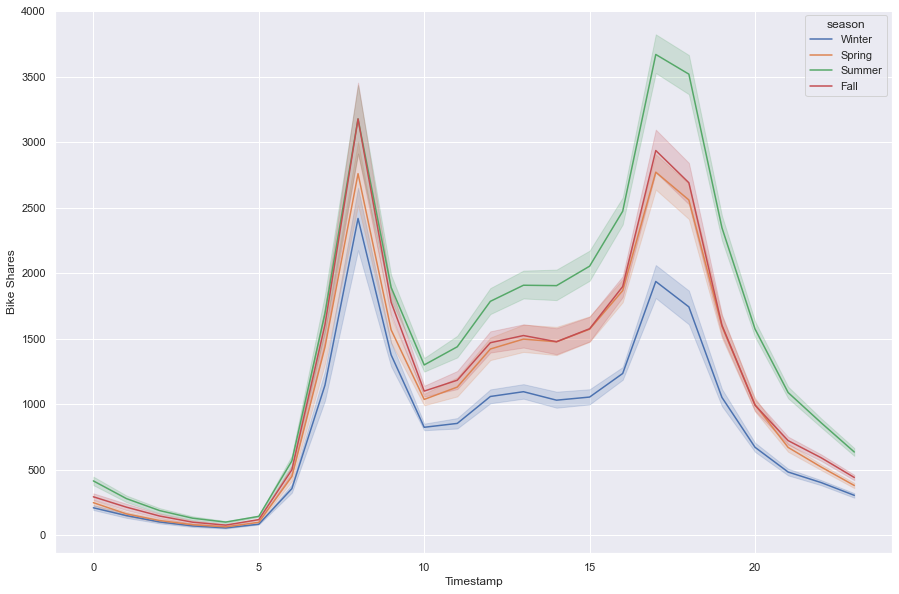

In [17]:
plt.figure(figsize=(15, 10))

plt.xlabel('Timestamp')
plt.ylabel('Bike Shares')

sns.lineplot(x=df.is_holiday.index.hour,
            y=df.cnt,
            hue=df.season);

### Bike Shares by the Day of the Week <a class="anchor" id="dayoftheweek"></a>

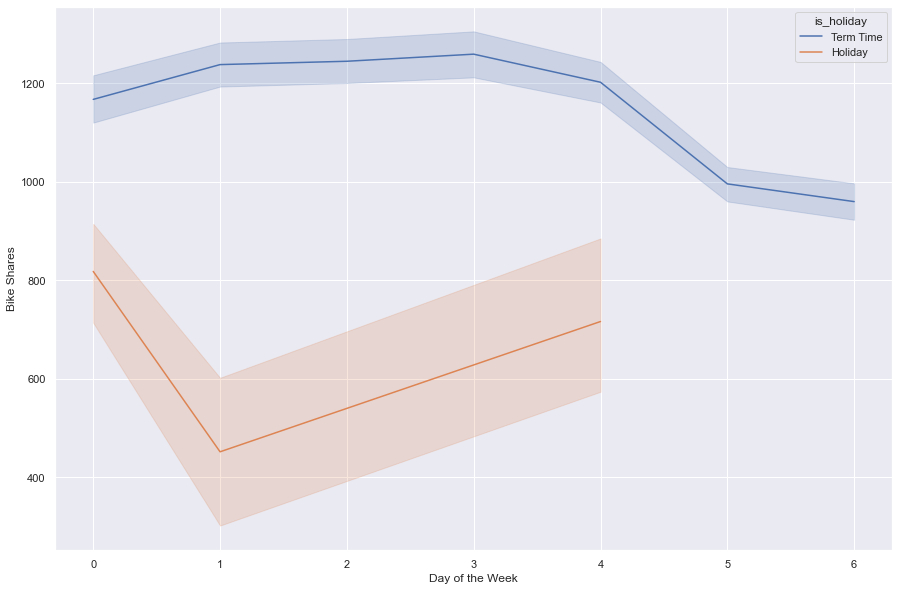

In [31]:
plt.figure(figsize=(15, 10))

sns.lineplot(x=df.day_of_the_week,
             y=df.cnt,
             hue=df.is_holiday.apply(lambda x: 'Holiday' if x == 1 else 'Term Time'))

plt.xlabel('Day of the Week')
plt.ylabel('Bike Shares');

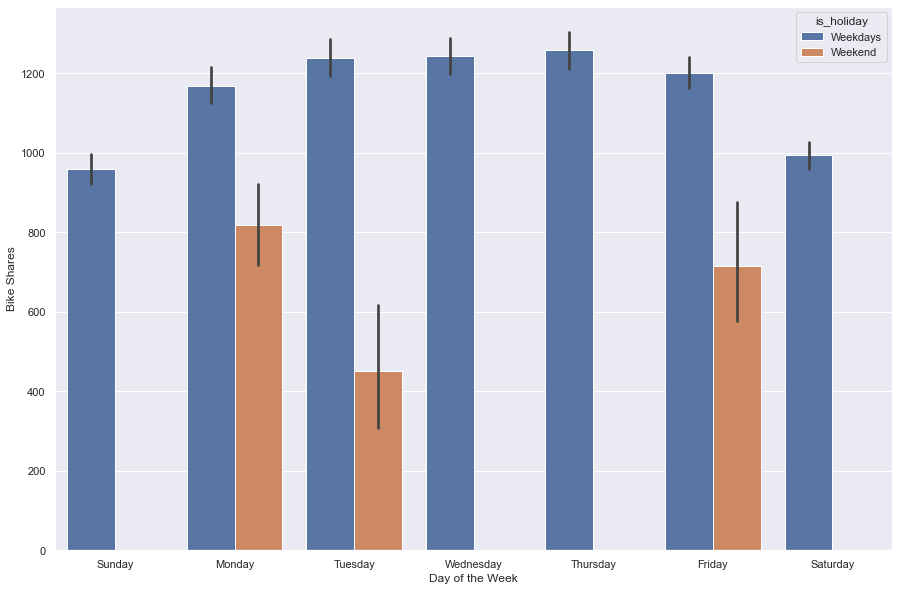

In [20]:
plt.figure(figsize=(15, 10))

sns.barplot(x=df.day_of_the_week.apply(lambda x: 'Monday' if x == 0 else
                                       ('Tuesday' if x == 1 else
                                        ("Wednesday" if x == 2 else
                                         ('Thursday' if x == 3 else
                                          ('Friday' if x == 4 else
                                           ('Saturday' if x == 5 else
                                            ('Sunday' if x == 6 else
                                             None))))))),
            y=df.cnt,
            hue=df.is_holiday.apply(lambda x: 'Weekend' if x == 1 else 'Weekdays'))

plt.xlabel('Day of the Week')
plt.ylabel('Bike Shares');

### Bike Shares by the Day of the Month <a class="anchor" id="dayofthemonth"></a>

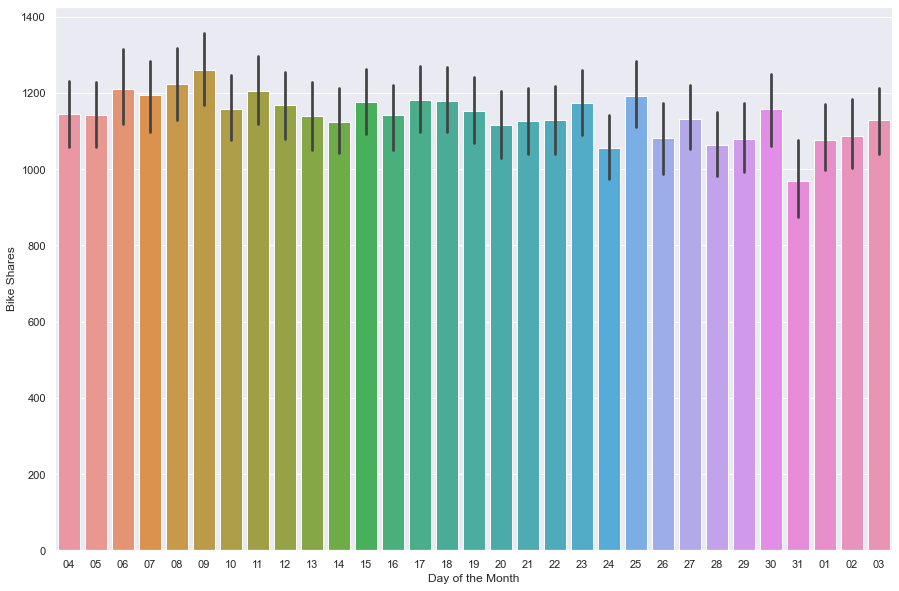

In [21]:
plt.figure(figsize=(15, 10))

sns.barplot(x=df.day_of_the_month,
            y=df.cnt)

plt.xlabel('Day of the Month')
plt.ylabel('Bike Shares');

### Bike Shares by Year <a class="anchor" id="byyear"></a>

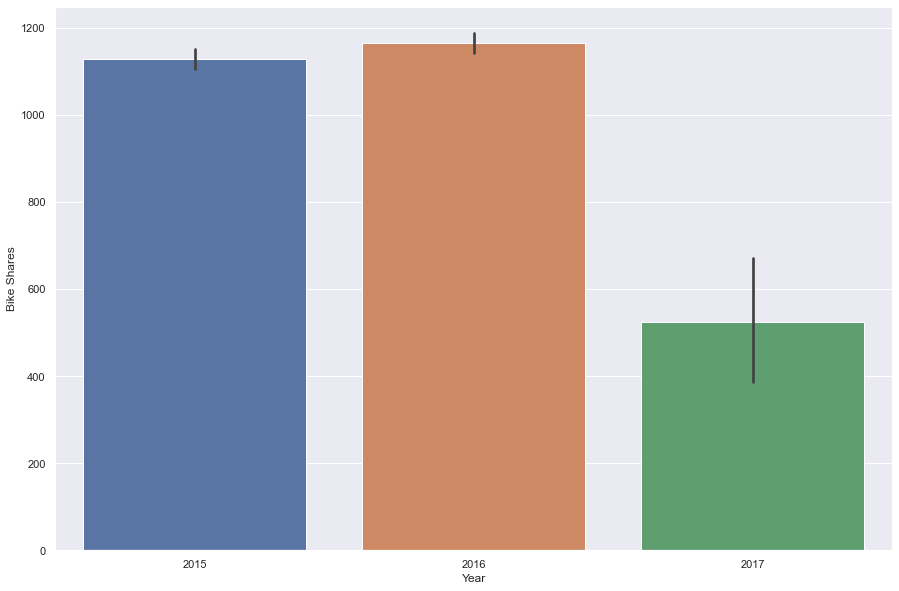

In [22]:
plt.figure(figsize=(15, 10))

sns.barplot(x=df.year,
            y=df.cnt)

plt.xlabel('Year')
plt.ylabel('Bike Shares');

### Bike Shares on Holidays by Seasons<a class="anchor" id="onholidaysbyseasons"></a>

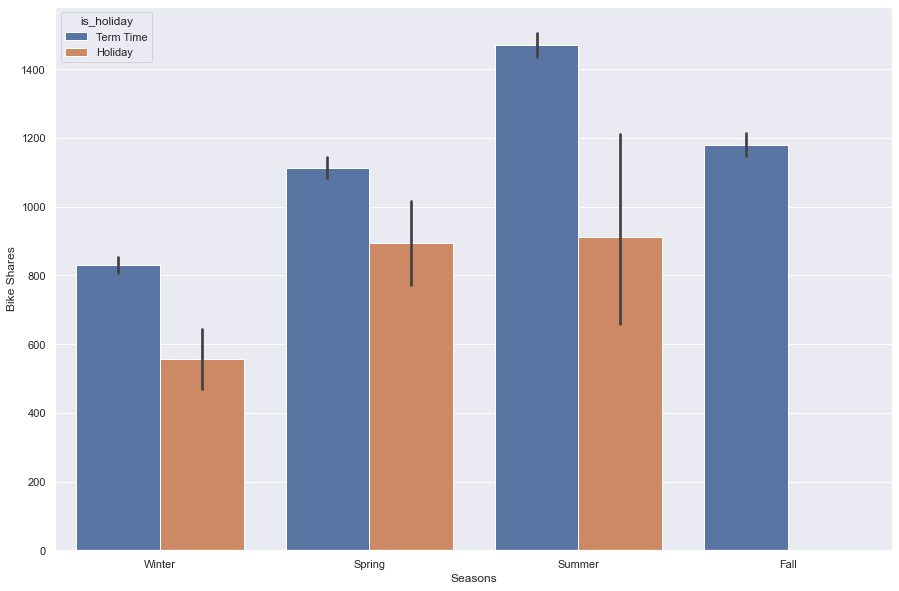

In [33]:
plt.figure(figsize=(15, 10))

sns.barplot(x=df.season,
            y=df.cnt,
            hue=df.is_holiday.apply(lambda x: 'Holiday' if x == 1 else 'Term Time'))

plt.xlabel('Seasons')
plt.ylabel('Bike Shares');

### Distribution of Bike Shares by Weekdays/Weekend <a class="anchor" id="bikesharesbyweekdays"></a>

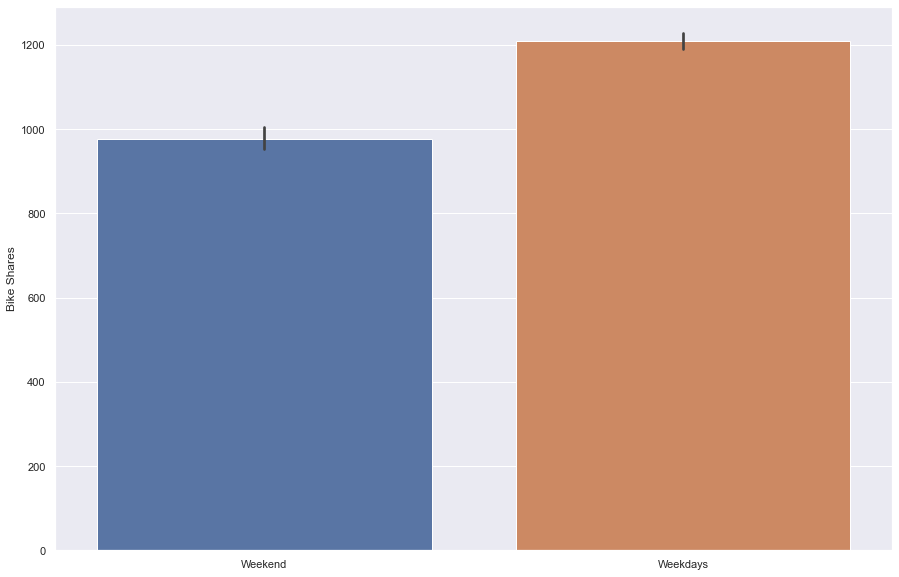

In [24]:
plt.figure(figsize=(15, 10))

sns.barplot(x=df.is_weekend.apply(lambda x: 'Weekend' if x == 1 else 'Weekdays'),
            y=df.cnt)

plt.xlabel('')
plt.ylabel('Bike Shares');

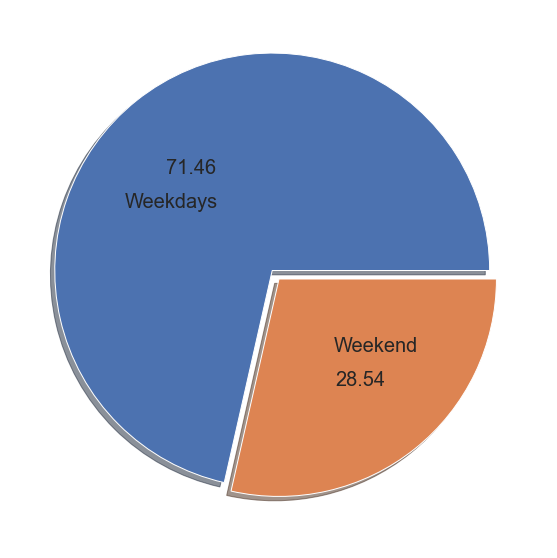

In [25]:
plt.figure(figsize=(15, 10))

plt.pie(x=df.is_weekend.value_counts(),
        labels=['Weekdays', 'Weekend'],
        labeldistance=0.4,
        autopct='%.2f',
        textprops={'fontsize' : 20},
        shadow=True,
        explode=[0.05, 0]);

### Distribution of Weather Condition by Seasons<a class="anchor" id="wconditions"></a>

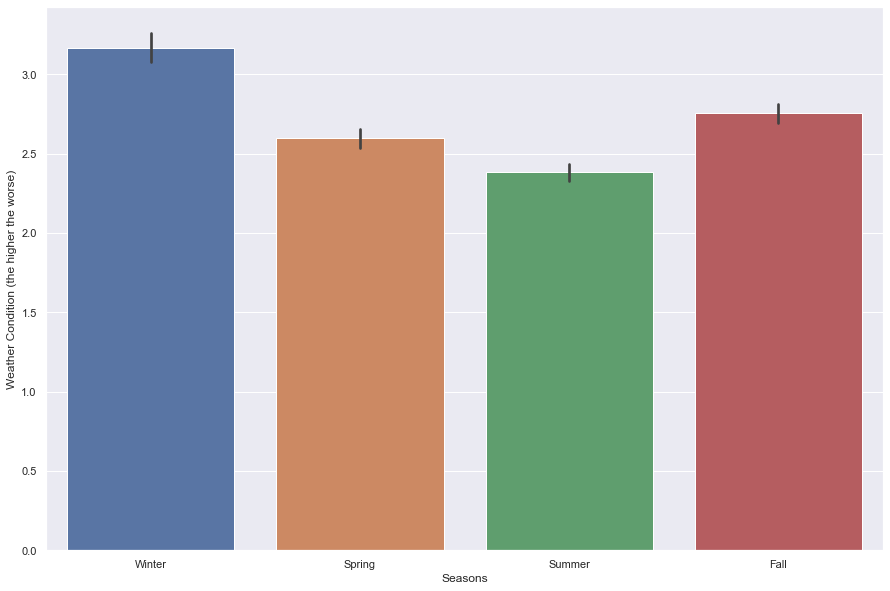

In [35]:
plt.figure(figsize=(15, 10))

sns.barplot(x=df.season,
            y=df.weather_code)

plt.xlabel('Seasons')
plt.ylabel('Weather Condition (the higher the worse)');

## Conclusion<a class="anchor" id="conc"></a>